In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plots
from sklearn.neighbors import KNeighborsClassifier # Closest neighbors 
from sklearn.metrics import accuracy_score # Accuracy metrics
from sklearn.neural_network import MLPClassifier

import os
print(os.listdir("../input"))

['mnist_train.csv', 'mnist_test.csv']


In [23]:
# Loading data
mnist_train = pd.read_csv("../input/mnist_train.csv")
mnist_test  = pd.read_csv("../input/mnist_test.csv")

# Initialising column headers
cols = ["label"]
for i in range(784):
    cols.append("px_{}".format(i + 1))

# Labeling the columns
mnist_train.columns = cols
mnist_test.columns  = cols

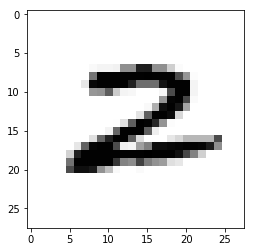

In [24]:
# Get image from row of numbers
image_row_id  = 199
image_row = mnist_train.values[image_row_id, 1:] # image_row.shape = (784,)
# Reshape the row into 28x28 matrix
image_shaped = image_row.reshape(28, 28)
# Show image
plt.imshow(image_shaped, cmap="Greys")

In [25]:
# Getting train and test data values
# train - data from which the model will train,             we will train from it
# test  - data from which the model will test its accuracy, we will check if true values and predicted values are correct from it
train_data = mnist_train.values[:, 1:] # (60000, 784) 60000x784 matrix
test_data  = mnist_test.values[:, 1:]  # (10000, 784) 10000x784 matrix

# Getting labels for train and test data values
# Labels are the real values of data, the representation of what the data holds in itself
# Labels here are the digits from 0 to 9, and the data is 28x28 grid with grayscale numbers from 0 to 255
train_label = mnist_train.values[:, 0] # (60000,) 60000x1 matrix / vector column
test_label  = mnist_test.values[:, 0]  # (10000,) 10000x1 matrix / vector column

In [26]:
print(train_data.shape, train_label.shape)
print(test_data.shape, test_label.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [ ]:
# Closest neighbors algorithm usage
# n_jobs = how many cpu cores will be used
#     -1 = all you have
# In these steps we train the model using TRAIN DATA (train_data)
# by giving it our dataset with values (28x28) and giving it correct values as labels so they map like this:
# label => 28x28 pic
# 7     => 1x784 matrix / vector row of pixels that has shape of a 7
# 3     => 1x784 shape of 3
# 2     => 1x784 shape of 2
# etc
# And then we will test what our trained model will predict if we give her
# some test data she hadn't seen before
# So the model will take her knowledge and tries to PREDICT what it will be
kn_classifier = KNeighborsClassifier(n_jobs=-1)
# .fit(x, y): fit the model using X as train data and Y as target values
kn_classifier = kn_classifier.fit(train_data, train_label)

In [ ]:
# We should look up onto our test data and check by ourselves 
# what the random-picked row (digit) contains
test_row_id = 199
test_row_matrix = test_data[test_row_id, :].reshape(28, 28) # We taking the test_row_id ROW, and ALL the COLUMNS the test_data row contains
                                                            # and reshape it so it will like like 28x28 matrix of colormapped color brightness
plt.imshow(test_row_matrix, cmap="Greys")
print('The digit on a plot is: {}'.format(test_label[test_row_id]))

In [ ]:
# Then, we are trying to predict with Closest neighbors classifier on a same number 
# predict(labels) - predict the class LABELS for provided data
kn_classifier.predict(test_data[test_row_id, :].reshape(1, 784))

In [ ]:
# So on, using metrics we doing the same stuff with all test data set
kn_predictions = kn_classifier.predict(test_data)
# And output of a total score
total_score = accuracy_score(test_label, kn_predictions)
print("Точность модели: {}".format(total_score * 100))

In [27]:
# Neural network
# Same as with closest neighbors, we fit, we predict
# verbose = Do output
# max_iter = max iterations
# n_iter_no_change = how many iterations without breaking the delta there should be 
mlp_classifier = MLPClassifier(verbose=True, max_iter=750, n_iter_no_change=700)
mlp_classifier = mlp_classifier.fit(train_data, train_label)

Iteration 1, loss = 2.40887741
Iteration 2, loss = 0.83834367
Iteration 3, loss = 0.46925628
Iteration 4, loss = 0.33188863
Iteration 5, loss = 0.24610761
Iteration 6, loss = 0.20453632
Iteration 7, loss = 0.17623661
Iteration 8, loss = 0.15055558
Iteration 9, loss = 0.13902115
Iteration 10, loss = 0.12824005
Iteration 11, loss = 0.12335654
Iteration 12, loss = 0.11821255
Iteration 13, loss = 0.12211546
Iteration 14, loss = 0.10948673
Iteration 15, loss = 0.10321836
Iteration 16, loss = 0.10271990
Iteration 17, loss = 0.09101988
Iteration 18, loss = 0.09576018
Iteration 19, loss = 0.08981042
Iteration 20, loss = 0.08540228
Iteration 21, loss = 0.08174301
Iteration 22, loss = 0.07382168
Iteration 23, loss = 0.07428456
Iteration 24, loss = 0.07569388
Iteration 25, loss = 0.07544307
Iteration 26, loss = 0.06834083
Iteration 27, loss = 0.06387472
Iteration 28, loss = 0.06696220
Iteration 29, loss = 0.06384428
Iteration 30, loss = 0.06886659
Iteration 31, loss = 0.07061539
Iteration 32, los

Iteration 253, loss = 0.01662432
Iteration 254, loss = 0.02348027
Iteration 255, loss = 0.01848896
Iteration 256, loss = 0.01496719
Iteration 257, loss = 0.01944046
Iteration 258, loss = 0.02265420
Iteration 259, loss = 0.02459019
Iteration 260, loss = 0.01387690
Iteration 261, loss = 0.01235397
Iteration 262, loss = 0.02599904
Iteration 263, loss = 0.02604495
Iteration 264, loss = 0.01371631
Iteration 265, loss = 0.02627044
Iteration 266, loss = 0.01674155
Iteration 267, loss = 0.01828384
Iteration 268, loss = 0.02992885
Iteration 269, loss = 0.01787442
Iteration 270, loss = 0.01678338
Iteration 271, loss = 0.01326467
Iteration 272, loss = 0.01698978
Iteration 273, loss = 0.02677139
Iteration 274, loss = 0.02863138
Iteration 275, loss = 0.01906847
Iteration 276, loss = 0.01081863
Iteration 277, loss = 0.01416752
Iteration 278, loss = 0.01693183
Iteration 279, loss = 0.02732817
Iteration 280, loss = 0.02723809
Iteration 281, loss = 0.01841862
Iteration 282, loss = 0.01710279
Iteration 

Iteration 502, loss = 0.01451635
Iteration 503, loss = 0.00994410
Iteration 504, loss = 0.01419540
Iteration 505, loss = 0.01539038
Iteration 506, loss = 0.01426154
Iteration 507, loss = 0.01318761
Iteration 508, loss = 0.01401938
Iteration 509, loss = 0.01601212
Iteration 510, loss = 0.01124595
Iteration 511, loss = 0.00832918
Iteration 512, loss = 0.01688224
Iteration 513, loss = 0.02102772
Iteration 514, loss = 0.01803640
Iteration 515, loss = 0.01337559
Iteration 516, loss = 0.02088762
Iteration 517, loss = 0.01778825
Iteration 518, loss = 0.00907430
Iteration 519, loss = 0.00847518
Iteration 520, loss = 0.00981502
Iteration 521, loss = 0.01900952
Iteration 522, loss = 0.00888569
Iteration 523, loss = 0.01324906
Iteration 524, loss = 0.03088002
Iteration 525, loss = 0.01905275
Iteration 526, loss = 0.00910279
Iteration 527, loss = 0.01266393
Iteration 528, loss = 0.00665144
Iteration 529, loss = 0.00626488
Iteration 530, loss = 0.01519974
Iteration 531, loss = 0.02009053
Iteration 

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [28]:
# Now we predict the number using neural network Multi-layer perceptron
mlp_classifier.predict(test_data[test_row_id, :].reshape(1, 784))

array([2])

In [29]:
# Now we predict all the numbers!
# And check the accuracy score!
mlp_predictions = mlp_classifier.predict(test_data)
mlp_total_score = accuracy_score(test_label, mlp_predictions)
print("Точность модели MLP: {}".format(mlp_total_score * 100))

Точность модели MLP: 96.99
